# Mini Project Investigate Hotel Business using Data Visualization
- By : Muhammad Ariq Arfina
- Linkedin : https://www.linkedin.com/in/muhammad-ariq-arfina-2633b5195/

# 1. Data Preprocessing

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Pengamatan :
1. Data terdiri dari 119390
2. Terlihat beberapa data masih banyak yang null
3. Beberapa kolom integer perlu dijadikan str, seperti kolom date

## Missing Data

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Strategi mengatasi missing values :
1. `children`: Input dengan 0 
2. `agent` & `company` : Input dengan 0
3. `city` : Input dengan 'Unknown'

In [5]:
#input missing values
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['children'] = df['children'].fillna(0)

In [6]:
df['city'] = df['city'].fillna('unknown')

In [7]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Data terlihat sudah tidak ada missing value

Fitur yang perlu di remove/ merge:
1. `adults`,`children`,`babies` perlu di merge menjadi `guest`
2. kategori Undefined pada `meal` di rubah menjadi `no meal`

## Merge & changing value

In [8]:
df["meal"].replace("Undefined", "No Meal", inplace=True)

In [9]:
df["guest"] = df["adults"]+df["children"]+df["babies"]

In [10]:
df_after = df[df["guest"] > 0].copy()

In [11]:
print('Total Rows before pre-processing :', df.shape[0])
print('Total Rows after pre-processing :', df_after.shape[0])

Total Rows before pre-processing : 119390
Total Rows after pre-processing : 119210


# 2. Analyzing The Amount of Monthly Hotel Booking per Month

In [13]:
df_after.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [14]:
df_copy = df_after.copy()

In [30]:
df_agg1 = df_after.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_agg1.columns = ['type', 'arrival_month', 'year', 'total_booking']
df_agg1

,type,arrival_month,year,total_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Ada perbedaan jumlah tahun yang tercatat untuk beberapa data, sehingga kita perlu membagi nomor pemesanan dengan jumlah tahun untuk mendapatkan rata-rata pemesanan bulanan

In [32]:
df_agg1['average_book_month'] = round(df_agg1['total_booking']/df_agg1['year'])
df_agg1

,type,arrival_month,year,total_booking,average_book_month
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [78]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_agg1["month"] = df_agg1["arrival_month"].str[:3]
df_agg1["month"] = pd.Categorical(df_agg1["month"], categories=months, ordered=True) 

df_agg1.head()

,type,arrival_month,year,total_booking,average_book_month,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


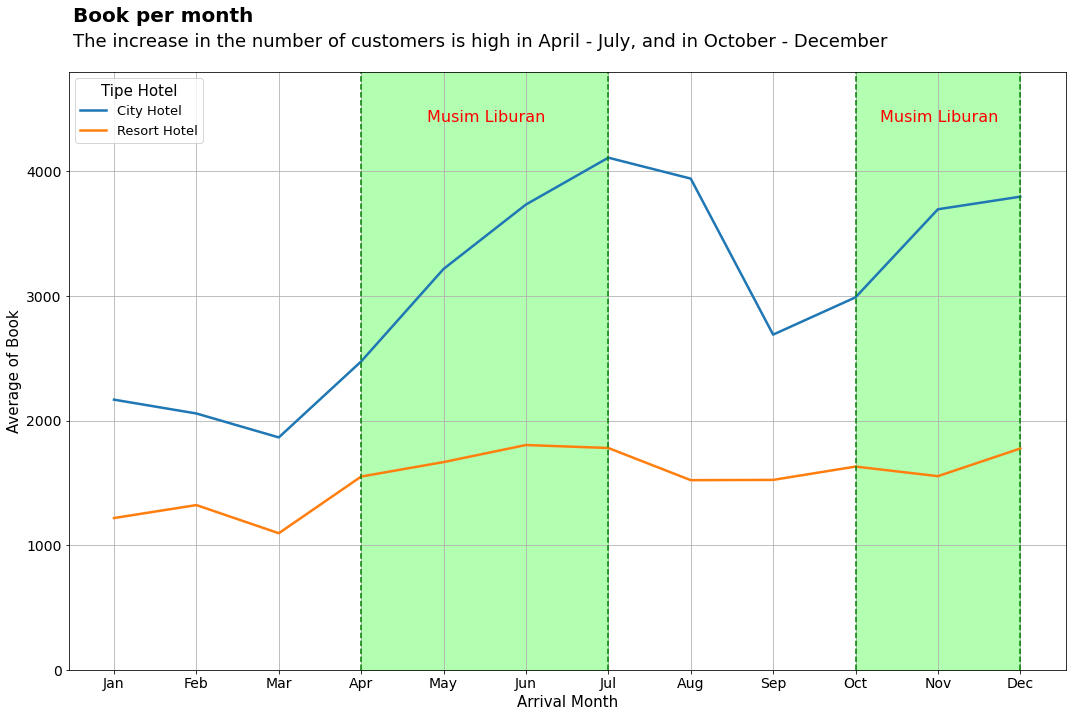

In [164]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='average_book_month', hue='type', 
             size="type", sizes=(2.5, 2.5), data=df_agg1)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Tipe Hotel', title_fontsize=15, prop={'size':13})

plt.xlabel('Arrival Month', fontsize=15) 
plt.ylabel('Average of Book', fontsize=15)
plt.ylim(0, 4800)

plt.axvline(3, ls='--', color='green')
plt.axvline(6, ls='--', color='green')
plt.text(x=3.8, y=4400, s='Musim Liburan', fontsize=16, color='red')
plt.stackplot(np.arange(3,7,1), [[4800]], color='lime', alpha=0.3)

plt.axvline(9, ls='--', color='green')
plt.axvline(11, ls='--', color='green')
plt.text(x=9.3, y=4400, s='Musim Liburan', fontsize=16, color='red')
plt.stackplot(np.arange(9,12,1), [[4800]], color='lime', alpha=0.3)

plt.text(x=-0.5, y=5200, s="Book per month ", 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=5000, s="The increase in the number of customers is high in April - July, and in October - December", 
         fontsize=18)

plt.tight_layout()
plt.savefig("Test 0.png")

# 3. The impact of stay duration to hotel cancelation

In [108]:
df_after.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [109]:
df_copy2 = df_after.copy()

In [110]:
df_copy2['total_stay_night'] = df_copy2['stays_in_weekend_nights']+df_copy2['stays_in_weekdays_nights']

Text(0.5, 1.0, 'Total Nights')

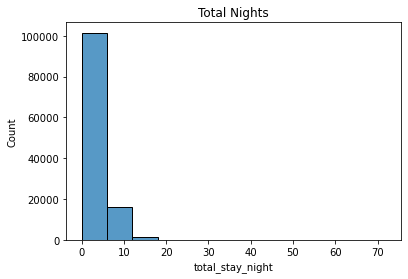

In [111]:
sns.histplot(x = 'total_stay_night', data=df_copy2, binwidth = 6)
plt.title('Total Nights')

Untuk mendapatkan representasi data yang lebih baik, kami akan mengelompokkan beberapa masa inap di mana orang yang menghabiskan 14-20 hari akan dikelompokkan menjadi dua minggu(14), dan mereka yang tinggal selama 21 hari dan lebih akan dikelompokkan ke dalam 'tiga minggu( 21)'

In [112]:
df_copy2['total_stay_night_group'] = np.where(df_copy2['total_stay_night'] > 21, 21, 
                                       np.where(df_copy2['total_stay_night'] > 14, 15, df_copy2['total_stay_night']))

In [114]:
df2_group=df_copy2.groupby(['hotel','is_canceled', 'total_stay_night_group']).agg({'agent':'count'}).reset_index().rename(columns = {'agent' : 'booking_amount'})
df2_group

,hotel,is_canceled,total_stay_night_group,booking_amount
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
...,...,...,...,...
63,Resort Hotel,1,12,68
64,Resort Hotel,1,13,25
65,Resort Hotel,1,14,186
66,Resort Hotel,1,15,79


In [116]:
df2_pivot = df2_group.pivot_table(index=['hotel', 'total_stay_night_group'], columns='is_canceled', values='booking_amount').reset_index()

In [117]:
df2_pivot['percentage_cancelled']=round(df2_pivot[1]/(df2_pivot[0]+df2_pivot[1])*100,2)
df2_pivot

is_canceled,hotel,total_stay_night_group,0,1,percentage_cancelled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


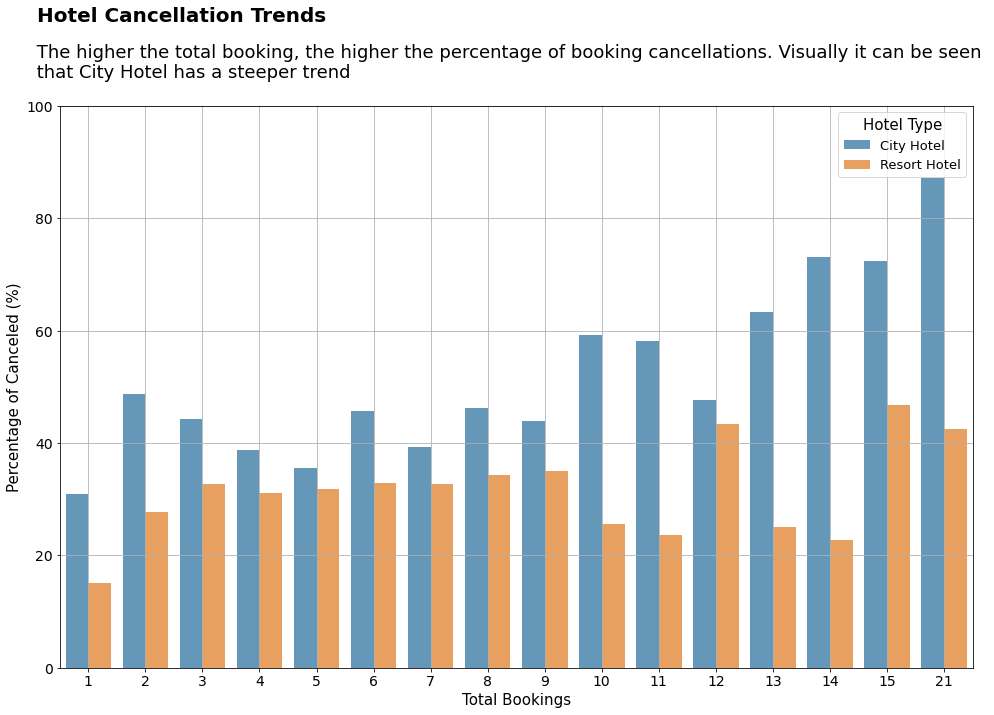

In [131]:
plt.figure(figsize = (15,10))
sns.barplot(x='total_stay_night_group', y='percentage_cancelled', hue='hotel', data=df2_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})

plt.xlabel('Total Bookings', fontsize=15) 
plt.ylabel('Percentage of Canceled (%)', fontsize=15)
plt.ylim(0, 100) # membatasi y axis
plt.xlim(0.5, 16.5) # membatasi x axis

plt.text(x=0.1, y=115, s="Hotel Cancellation Trends", 
         fontsize=20, fontweight='bold')
plt.text(x=0.0, y=105, s=" The higher the total booking, the higher the percentage of booking cancellations. Visually it can be seen \n that City Hotel has a steeper trend", 
         fontsize=18)

plt.tight_layout()
plt.savefig("Test 1.png")

# 4. The impact of lead time to hotel cancelation

In [154]:
df4=df_after.copy()

In [133]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [136]:
df4=df4[['hotel','is_canceled','lead_time','adr']]
df['lead_time'].value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

Dari data diatas, kolom `lead_time` terlalu banyak unique values, sehingga diperlukan grouping

In [138]:
df4['lead_times'] = np.where(df_copy2['lead_time'] > 400, 401, df4['lead_time'])
bins = list(np.arange(0,max(df_copy2['lead_time'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels)

In [139]:
df4_group = df4.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df4_pivot = df4_group.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df4_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df4_pivot['bookings'] = df4_pivot['not_canceled']+df4_pivot['canceled']
df4_pivot['cancelation_percentage'] = round(df4_pivot['canceled']*100.0/(df4_pivot['not_canceled']+df4_pivot['canceled']),2)

In [141]:
df4_pivot

,hotel_type,lead_time_group,not_canceled,canceled,bookings,cancelation_percentage
0,City Hotel,0-30,18060,5184,23244,22.30
1,City Hotel,30-60,7266,4608,11874,38.81
2,City Hotel,60-90,5210,3692,8902,41.47
3,City Hotel,90-120,3956,3486,7442,46.84
4,City Hotel,120-150,3064,2542,5606,45.34
5,City Hotel,150-180,2442,2716,5158,52.66
6,City Hotel,180-210,1800,1793,3593,49.90
7,City Hotel,210-240,1224,1280,2504,51.12
8,City Hotel,240-270,880,1237,2117,58.43
9,City Hotel,270-300,660,1859,2519,73.80


In [145]:
df4_pivotcpy = df4_pivot.copy()

In [148]:
df4_pivotcpy = df4_pivotcpy.dropna().reset_index()

In [149]:
df4_pivotcpy

,level_0,index,hotel_type,lead_time_group,not_canceled,canceled,bookings,cancelation_percentage
0,0,0,City Hotel,0-30,18060,5184,23244,22.30
1,1,1,City Hotel,30-60,7266,4608,11874,38.81
2,2,2,City Hotel,60-90,5210,3692,8902,41.47
3,3,3,City Hotel,90-120,3956,3486,7442,46.84
4,4,4,City Hotel,120-150,3064,2542,5606,45.34
5,5,5,City Hotel,150-180,2442,2716,5158,52.66
6,6,6,City Hotel,180-210,1800,1793,3593,49.90
7,7,7,City Hotel,210-240,1224,1280,2504,51.12
8,8,8,City Hotel,240-270,880,1237,2117,58.43
9,9,9,City Hotel,270-300,660,1859,2519,73.80


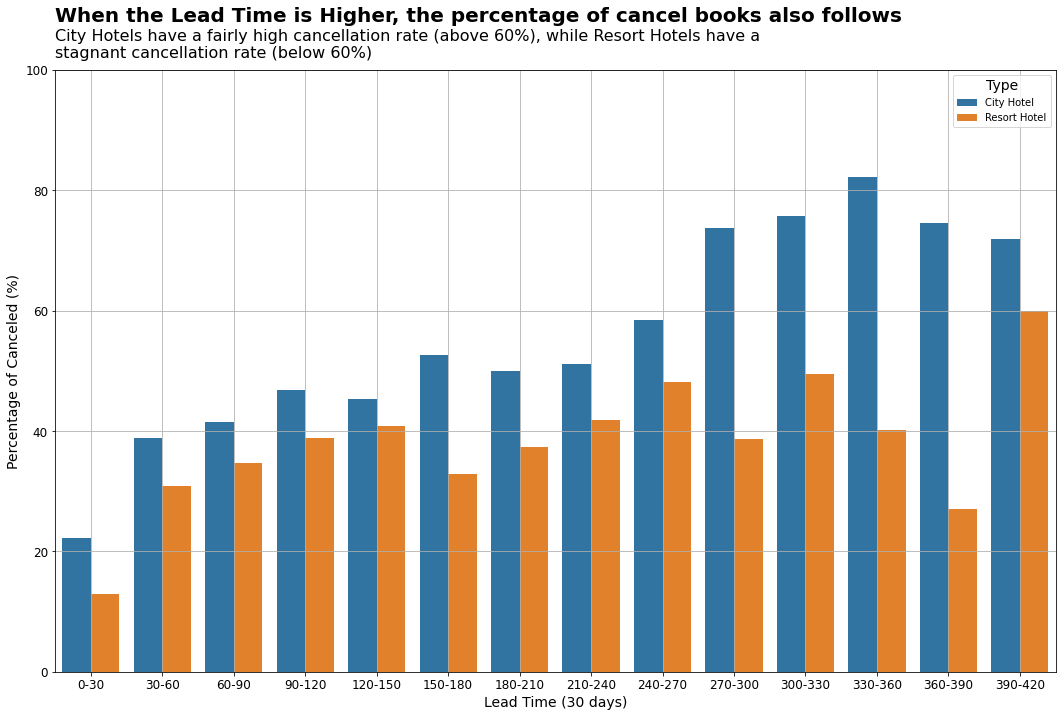

In [161]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='cancelation_percentage', hue='hotel_type', data=df4_pivotcpy)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Type', title_fontsize=14)

plt.xlabel('Lead Time (30 days)', fontsize=14)
plt.ylabel('Percentage of Canceled (%)', fontsize=14)
plt.ylim(0, 100)
plt.xlim(-0.5,13.5)

plt.text(x=-0.5, y=108, s="When the Lead Time is Higher, the percentage of cancel books also follows", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="City Hotels have a fairly high cancellation rate (above 60%), while Resort Hotels have a \nstagnant cancellation rate (below 60%)", 
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout()
plt.savefig('Test2.png', dpi=200)